# Dataframer: Wilson's Odyssey to Pandas DF

Here are some transformation and frequencies for future exploratory analysis of Wilson's Odyssey.

Columns: author, year, title, book_num, text, num_lines, num_sentences, num_words,

In [1]:
# READING FILE TO VARIABLE
filepath = "/Users/debr/odysseys_en/Normalized_txts/Odyssey_Wilson_Normalized_v2.txt"
with open(filepath, 'r') as file:
    lines = file.readlines()

text = "".join(lines)
print(text[:100])

Tell me about a complicated man.
Muse, tell me how he wandered and was lost
when he had wrecked the 


In [2]:
import re

# Split the text at each "Book" occurrence
books = re.split(r'BOOK\s', text)

# Remove the first element (it's empty or contains text before the first "Book")
if books[0].strip() == "":
    books = books[1:]
else:
    print("Warning: There was text before the first 'Book'")
# Remove "\n" from the beginning of each book
books = [book[1:] if book.startswith("\n") else book for book in books]

# Now 'books' contains each book's content without the "Book" prefix
print(len(books))  # Should be 24 if there are 24 books

24


In [4]:
first_lines = {f"book {i+1}": books[i].split("\n")[0] for i in range(24)}
first_lines

{'book 1': 'Tell me about a complicated man.',
 'book 2': 'A Dangerous Journey',
 'book 3': 'An Old King Remembers',
 'book 4': 'What the Sea God Said',
 'book 5': 'From the Goddess to the Storm',
 'book 6': 'A Princess and Her Laundry',
 'book 7': 'A Magical Kingdom',
 'book 8': 'The Songs of a Poet',
 'book 9': 'A Pirate in a Shepherd’s Cave',
 'book 10': 'The Winds and the Witch',
 'book 11': 'The Dead',
 'book 12': 'Diﬃcult Choices',
 'book 13': 'Two Tricksters',
 'book 14': 'A Loyal Slave',
 'book 15': 'The Prince Returns',
 'book 16': 'Father and Son',
 'book 17': 'Insults and Abuse',
 'book 18': 'Two Beggars',
 'book 19': 'The Queen and the Beggar',
 'book 20': 'The Last Banquet',
 'book 21': 'An Archery Contest',
 'book 22': 'Bloodshed',
 'book 23': 'The Olive Tree Bed',
 'book 24': 'Restless Spirits'}

In [5]:
# Split the text at each "." occurrence
first_sentences = {f"book {i+1}": books[i].split(".")[0] for i in range(24)}
first_sentences

{'book 1': 'Tell me about a complicated man',
 'book 2': 'A Dangerous Journey\nThe early Dawn was born; her fingers bloomed',
 'book 3': 'An Old King Remembers\nLeaving the Ocean’s streams, the Sun leapt up\ninto the sky of bronze, to shine his light\nfor gods and mortals on the fertile earth',
 'book 4': 'What the Sea God Said\nThey came to Sparta, land of caves and valleys,\nand drove to Menelaus’ house',
 'book 5': 'From the Goddess to the Storm\nThen Dawn rose up from bed with Lord Tithonus,\nto bring the light to deathless gods and mortals',
 'book 6': 'A Princess and Her Laundry\nOdysseus had suﬀered',
 'book 7': 'A Magical Kingdom\nOdysseus sat patiently and prayed',
 'book 8': 'The Songs of a Poet\nSoon Dawn appeared and touched the sky with roses',
 'book 9': 'A Pirate in a Shepherd’s Cave\nWily Odysseus, the lord of lies,\nanswered,\n“My lord Alcinous, great king,\nit is a splendid thing to hear a poet\nas talented as this',
 'book 10': 'The Winds and the Witch\n“We reached t

In [6]:
import pandas as pd
import re

def odyssey_dataframer(author, year, title, list_books, first_lines, first_sentences):
    """
    Splits a list_books into rows and creates a DataFrame.
    Args:
    list_books (list): The full text of the Odyssey
    author (str): Author name
    year (str): Publication year
    title (str): Book title
    first lines (dict): Dictionary with the first line of each book
    first sentences (dict): Dictionary with the first sentence of each book
    Returns:
    pd.DataFrame: DataFrame with columns for author, year, title, book_num, and text
    """
    # Create a list to store the data for each book
    data = []
    
    # Loop through each book in the list
    for i, book_text in enumerate(list_books, 1):  # Start counting from 1
        # Add a row for this book
        data.append({
            'author': author,
            'year': year,
            'title': title,
            'book_num': i,
            'first_line': first_lines[f"book {i}"],
            'first_sentence': first_sentences[f"book {i}"],
            'text': book_text
        })
    
    # Create the DataFrame from the data
    df = pd.DataFrame(data)
    
    return df


df = odyssey_dataframer("Wilson", "2017", "The Odyssey", books, first_lines, first_sentences)
df

,author,year,title,book_num,first_line,first_sentence,text
0,Wilson,2017,The Odyssey,1,Tell me about a complicated man.,Tell me about a complicated man,"Tell me about a complicated man.\nMuse, tell m..."
1,Wilson,2017,The Odyssey,2,A Dangerous Journey,A Dangerous Journey\nThe early Dawn was born; ...,A Dangerous Journey\nThe early Dawn was born; ...
2,Wilson,2017,The Odyssey,3,An Old King Remembers,An Old King Remembers\nLeaving the Ocean’s str...,An Old King Remembers\nLeaving the Ocean’s str...
3,Wilson,2017,The Odyssey,4,What the Sea God Said,"What the Sea God Said\nThey came to Sparta, la...","What the Sea God Said\nThey came to Sparta, la..."
4,Wilson,2017,The Odyssey,5,From the Goddess to the Storm,From the Goddess to the Storm\nThen Dawn rose ...,From the Goddess to the Storm\nThen Dawn rose ...
5,Wilson,2017,The Odyssey,6,A Princess and Her Laundry,A Princess and Her Laundry\nOdysseus had suﬀered,A Princess and Her Laundry\nOdysseus had suﬀer...
6,Wilson,2017,The Odyssey,7,A Magical Kingdom,A Magical Kingdom\nOdysseus sat patiently and ...,A Magical Kingdom\nOdysseus sat patiently and ...
7,Wilson,2017,The Odyssey,8,The Songs of a Poet,The Songs of a Poet\nSoon Dawn appeared and to...,The Songs of a Poet\nSoon Dawn appeared and to...
8,Wilson,2017,The Odyssey,9,A Pirate in a Shepherd’s Cave,"A Pirate in a Shepherd’s Cave\nWily Odysseus, ...","A Pirate in a Shepherd’s Cave\nWily Odysseus, ..."
9,Wilson,2017,The Odyssey,10,The Winds and the Witch,The Winds and the Witch\n“We reached the float...,The Winds and the Witch\n“We reached the float...


In [7]:
# Define functions to count lines, sentences, and words
def count_lines(text):
    """Function to count lines in a text by the number of newline characters.

    Args:
        text (string): The text to count lines in.

    Returns:
        integer: The number of lines in the text.
    """
    if pd.isna(text):  # Handle NaN values
        return 0
    return text.count('\n') + 1  # Count newlines, add 1 for the last line

def count_sentences(text):
    """Function to count sentences (using basic punctuation) in a text.

    Args:
        text (str): lines of the Odyssey 

    Returns:
        integer: number of sentences in the text
    """
    if pd.isna(text): # Handle NaN values
        return 0
    return len(re.split(r'[.!?]', text)) - 1  # - 1 skips the last part 

def count_words(text):
    """Count the number of words in a text 
    
    Args:
        text (str): lines of the Odyssey
        
        Returns:
        integer: number of words in the text
    """
    if pd.isna(text): # Handle NaN values
        return 0
    return len(re.findall(r'\b\w+\b', text))  # Match words using regex

# Apply functions & add new columns
df['num_lines'] = df['text'].apply(count_lines)
df['num_sentences'] = df['text'].apply(count_sentences)
df['num_words'] = df['text'].apply(count_words)

df

,author,year,title,book_num,first_line,first_sentence,text,num_lines,num_sentences,num_words
0,Wilson,2017,The Odyssey,1,Tell me about a complicated man.,Tell me about a complicated man,"Tell me about a complicated man.\nMuse, tell m...",459,243,3568
1,Wilson,2017,The Odyssey,2,A Dangerous Journey,A Dangerous Journey\nThe early Dawn was born; ...,A Dangerous Journey\nThe early Dawn was born; ...,451,260,3463
2,Wilson,2017,The Odyssey,3,An Old King Remembers,An Old King Remembers\nLeaving the Ocean’s str...,An Old King Remembers\nLeaving the Ocean’s str...,512,272,3916
3,Wilson,2017,The Odyssey,4,What the Sea God Said,"What the Sea God Said\nThey came to Sparta, la...","What the Sea God Said\nThey came to Sparta, la...",865,472,6860
4,Wilson,2017,The Odyssey,5,From the Goddess to the Storm,From the Goddess to the Storm\nThen Dawn rose ...,From the Goddess to the Storm\nThen Dawn rose ...,503,265,4054
5,Wilson,2017,The Odyssey,6,A Princess and Her Laundry,A Princess and Her Laundry\nOdysseus had suﬀered,A Princess and Her Laundry\nOdysseus had suﬀer...,340,179,2683
6,Wilson,2017,The Odyssey,7,A Magical Kingdom,A Magical Kingdom\nOdysseus sat patiently and ...,A Magical Kingdom\nOdysseus sat patiently and ...,366,180,2773
7,Wilson,2017,The Odyssey,8,The Songs of a Poet,The Songs of a Poet\nSoon Dawn appeared and to...,The Songs of a Poet\nSoon Dawn appeared and to...,619,323,4631
8,Wilson,2017,The Odyssey,9,A Pirate in a Shepherd’s Cave,"A Pirate in a Shepherd’s Cave\nWily Odysseus, ...","A Pirate in a Shepherd’s Cave\nWily Odysseus, ...",586,304,4755
9,Wilson,2017,The Odyssey,10,The Winds and the Witch,The Winds and the Witch\n“We reached the float...,The Winds and the Witch\n“We reached the float...,598,342,4788


Figure saved to /Users/debr/English-Homer/dataframers_by_author/plots/Wilson-sentence_freq.png


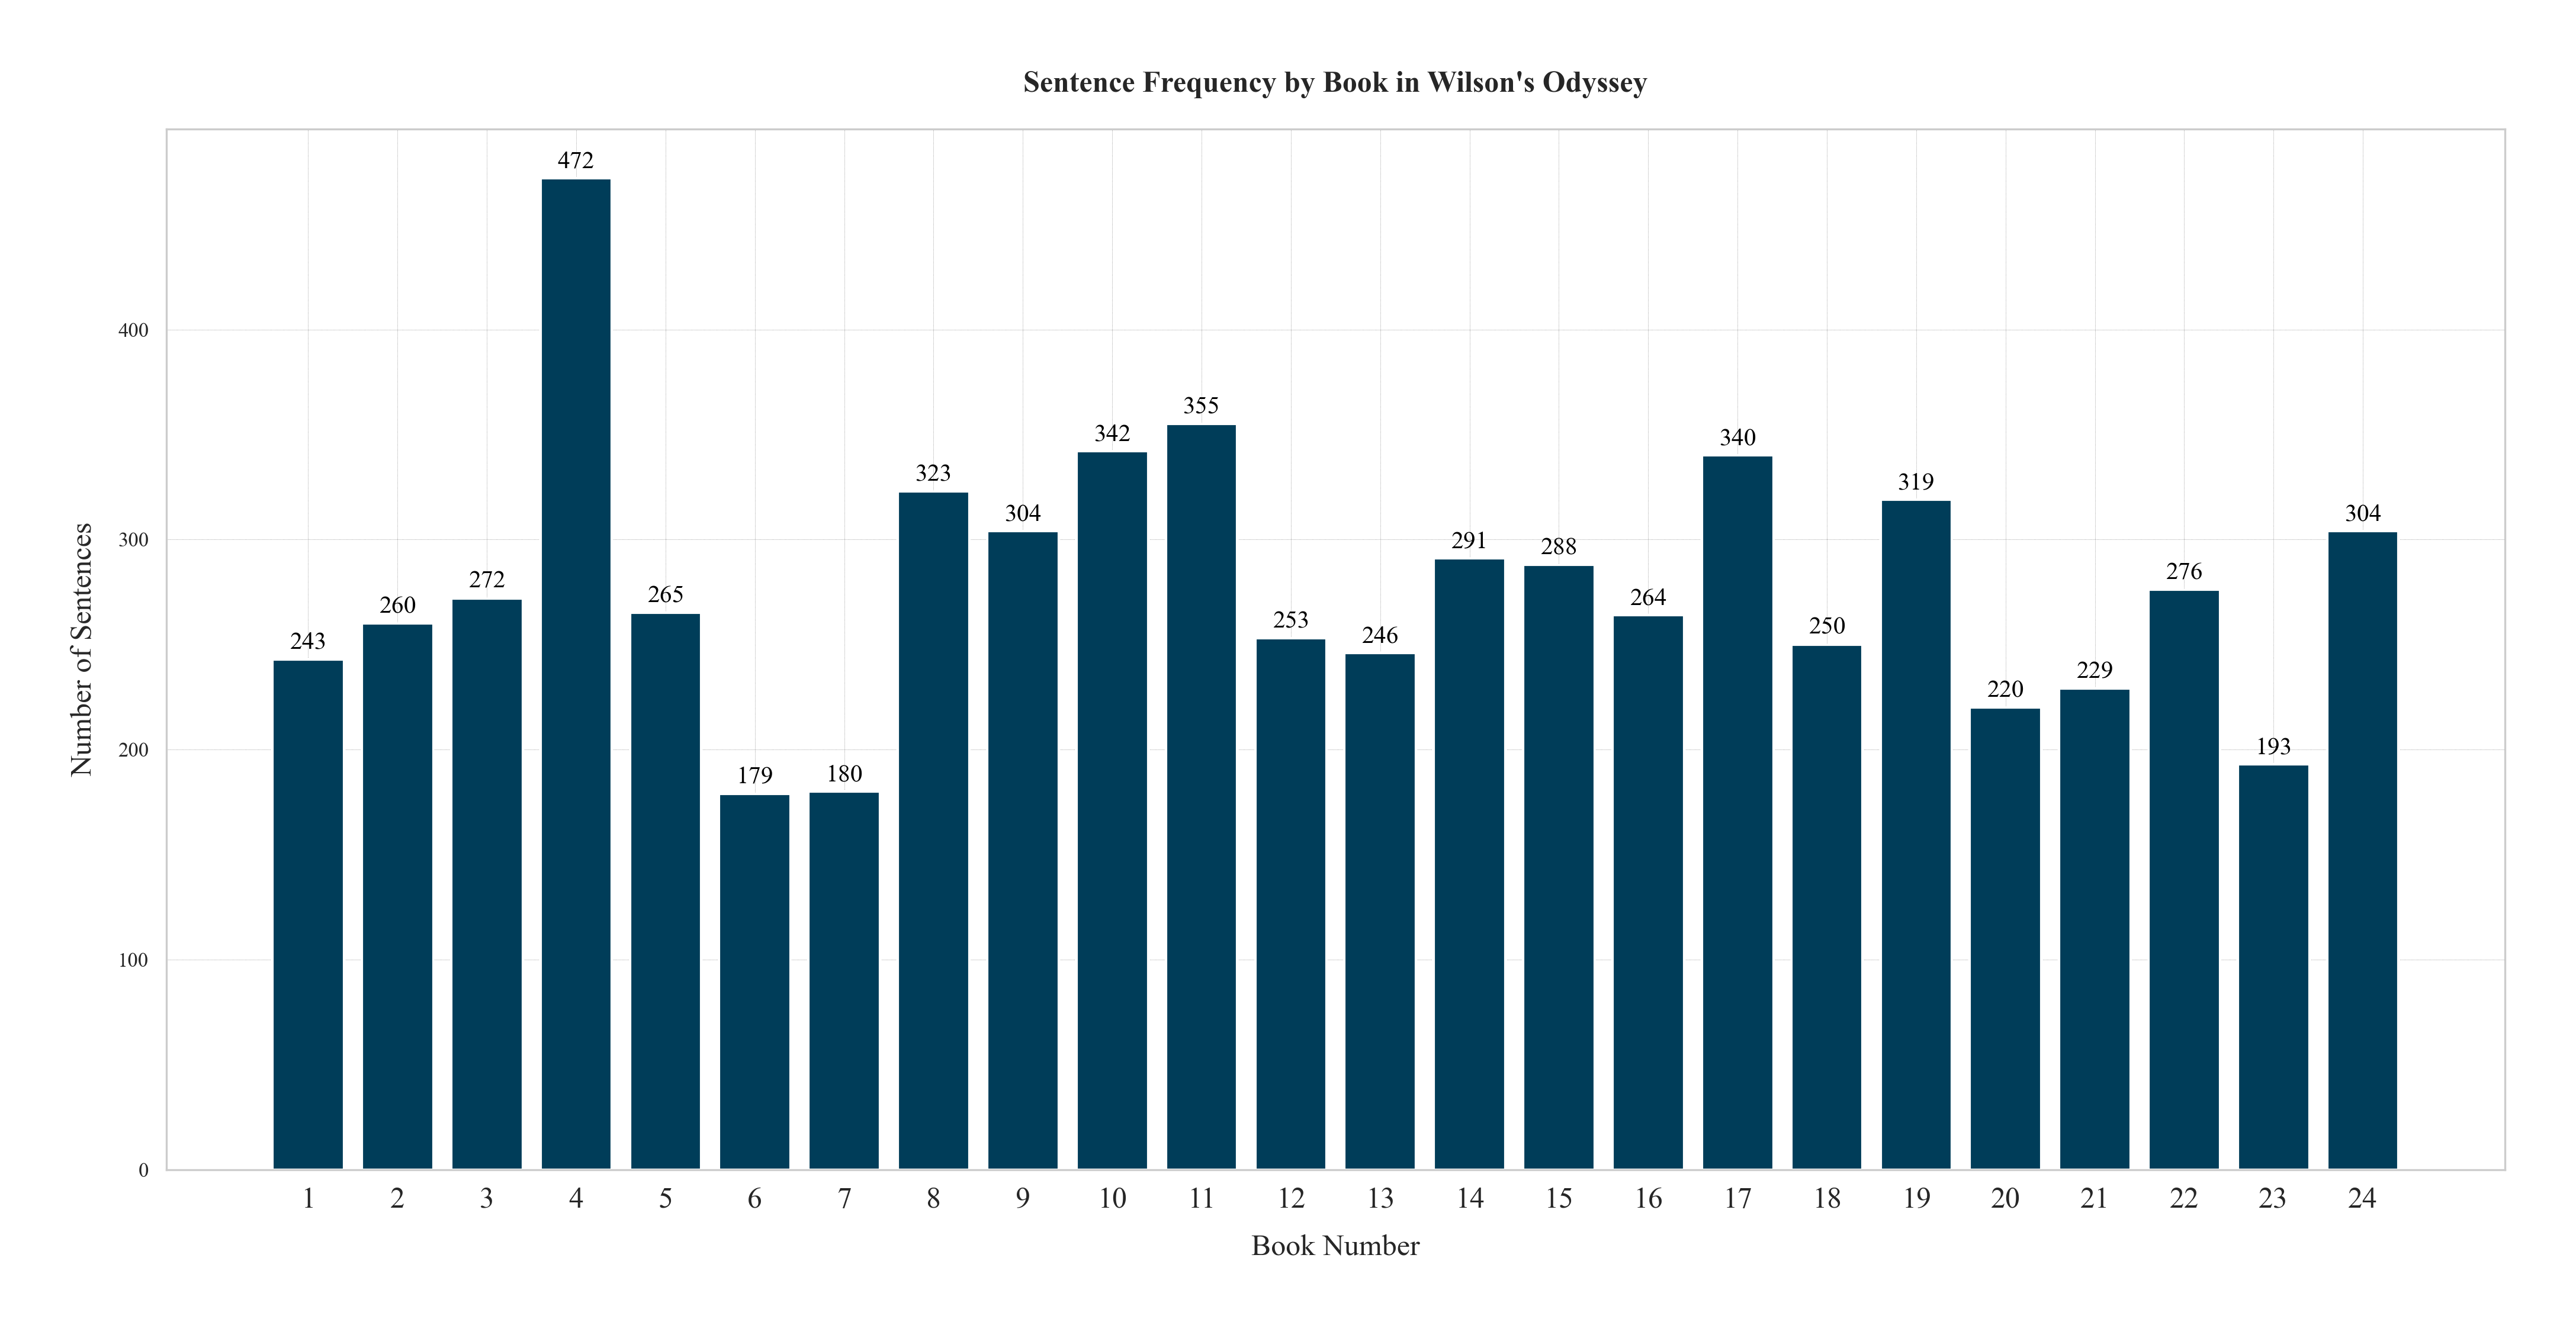

In [9]:
%matplotlib inline
import sys
import os
import matplotlib.pyplot as plt
# Add the directory containing visualization_utils.py to path
sys.path.append("/Users/debr/English-Homer/")
import visualization_utils as viz
import seaborn as sns
sns.set_style("whitegrid")

# palette astroblue   orange   genoa      carrot    tawny     neptune      SELAGO    mako   black
color = ['#003D59', '#FD6626','#177070','#FB871D','#641B5E','#86C3BC','#F5E1FD','#414A4F','k']
danB_plotstyle = {'figure.figsize': (12, 7), 
               'axes.labelsize': 'large', # fontsize for x and y labels (was large)
               'axes.titlesize': 'large', # fontsize for title
               'axes.titleweight': 'bold', # font type for title
               'xtick.labelsize': 'large', # fontsize for x 
               'ytick.labelsize':'small', # fontsize fory ticks
               'grid.color': 'k', # grid color
                'grid.linestyle': ':', # grid line style
                'grid.linewidth': 0.2, # grid line width
                'font.family': 'Times New Roman', # font family
                'grid.alpha': 0.5, # transparency of grid
               'figure.dpi': 300, # figure display resolution
               'savefig.bbox': 'tight', # tight bounding box
               'savefig.pad_inches': 0.4, # padding to use when saving
               'axes.titlepad': 15, # title padding
               'axes.labelpad': 8, # label padding
               'legend.borderpad': .6, # legend border padding
               'axes.prop_cycle': plt.cycler(
                color=color) # color cycle for plot lines
               }

# adjust matplotlib defaults
plt.rcParams.update(danB_plotstyle)
# Group by book_num and count the number of sentences in each book
sentences_per_book = df.groupby('book_num')['num_sentences'].sum()

# Create the plot using predefined styles
fig, ax = plt.subplots(figsize=(14, 7))

# Use predefined color cycle from viz.COLORS
ax.bar(sentences_per_book.index, sentences_per_book.values)  # Use 'orange'

ax.set_xlabel('Book Number')
ax.set_ylabel('Number of Sentences')
ax.set_title("Sentence Frequency by Book in Wilson's Odyssey")

# Ensure all book numbers are shown on the x-axis
ax.set_xticks(sentences_per_book.index)

# Grid styling from viz
ax.grid(axis='y', alpha=0.5)
# Add values on top of bars
for i, v in enumerate(sentences_per_book.values):
    ax.text(i + 1, v + 5, str(v), ha='center', fontsize=10, color='black')

# Apply tight layout
plt.tight_layout()

# Save the figure using the predefined function
viz.save_figure(fig, "/Users/debr/English-Homer/dataframers_by_author/plots/Wilson-sentence_freq.png")


Figure saved to /Users/debr/English-Homer/dataframers_by_author/plots/lines_freq_bB.png


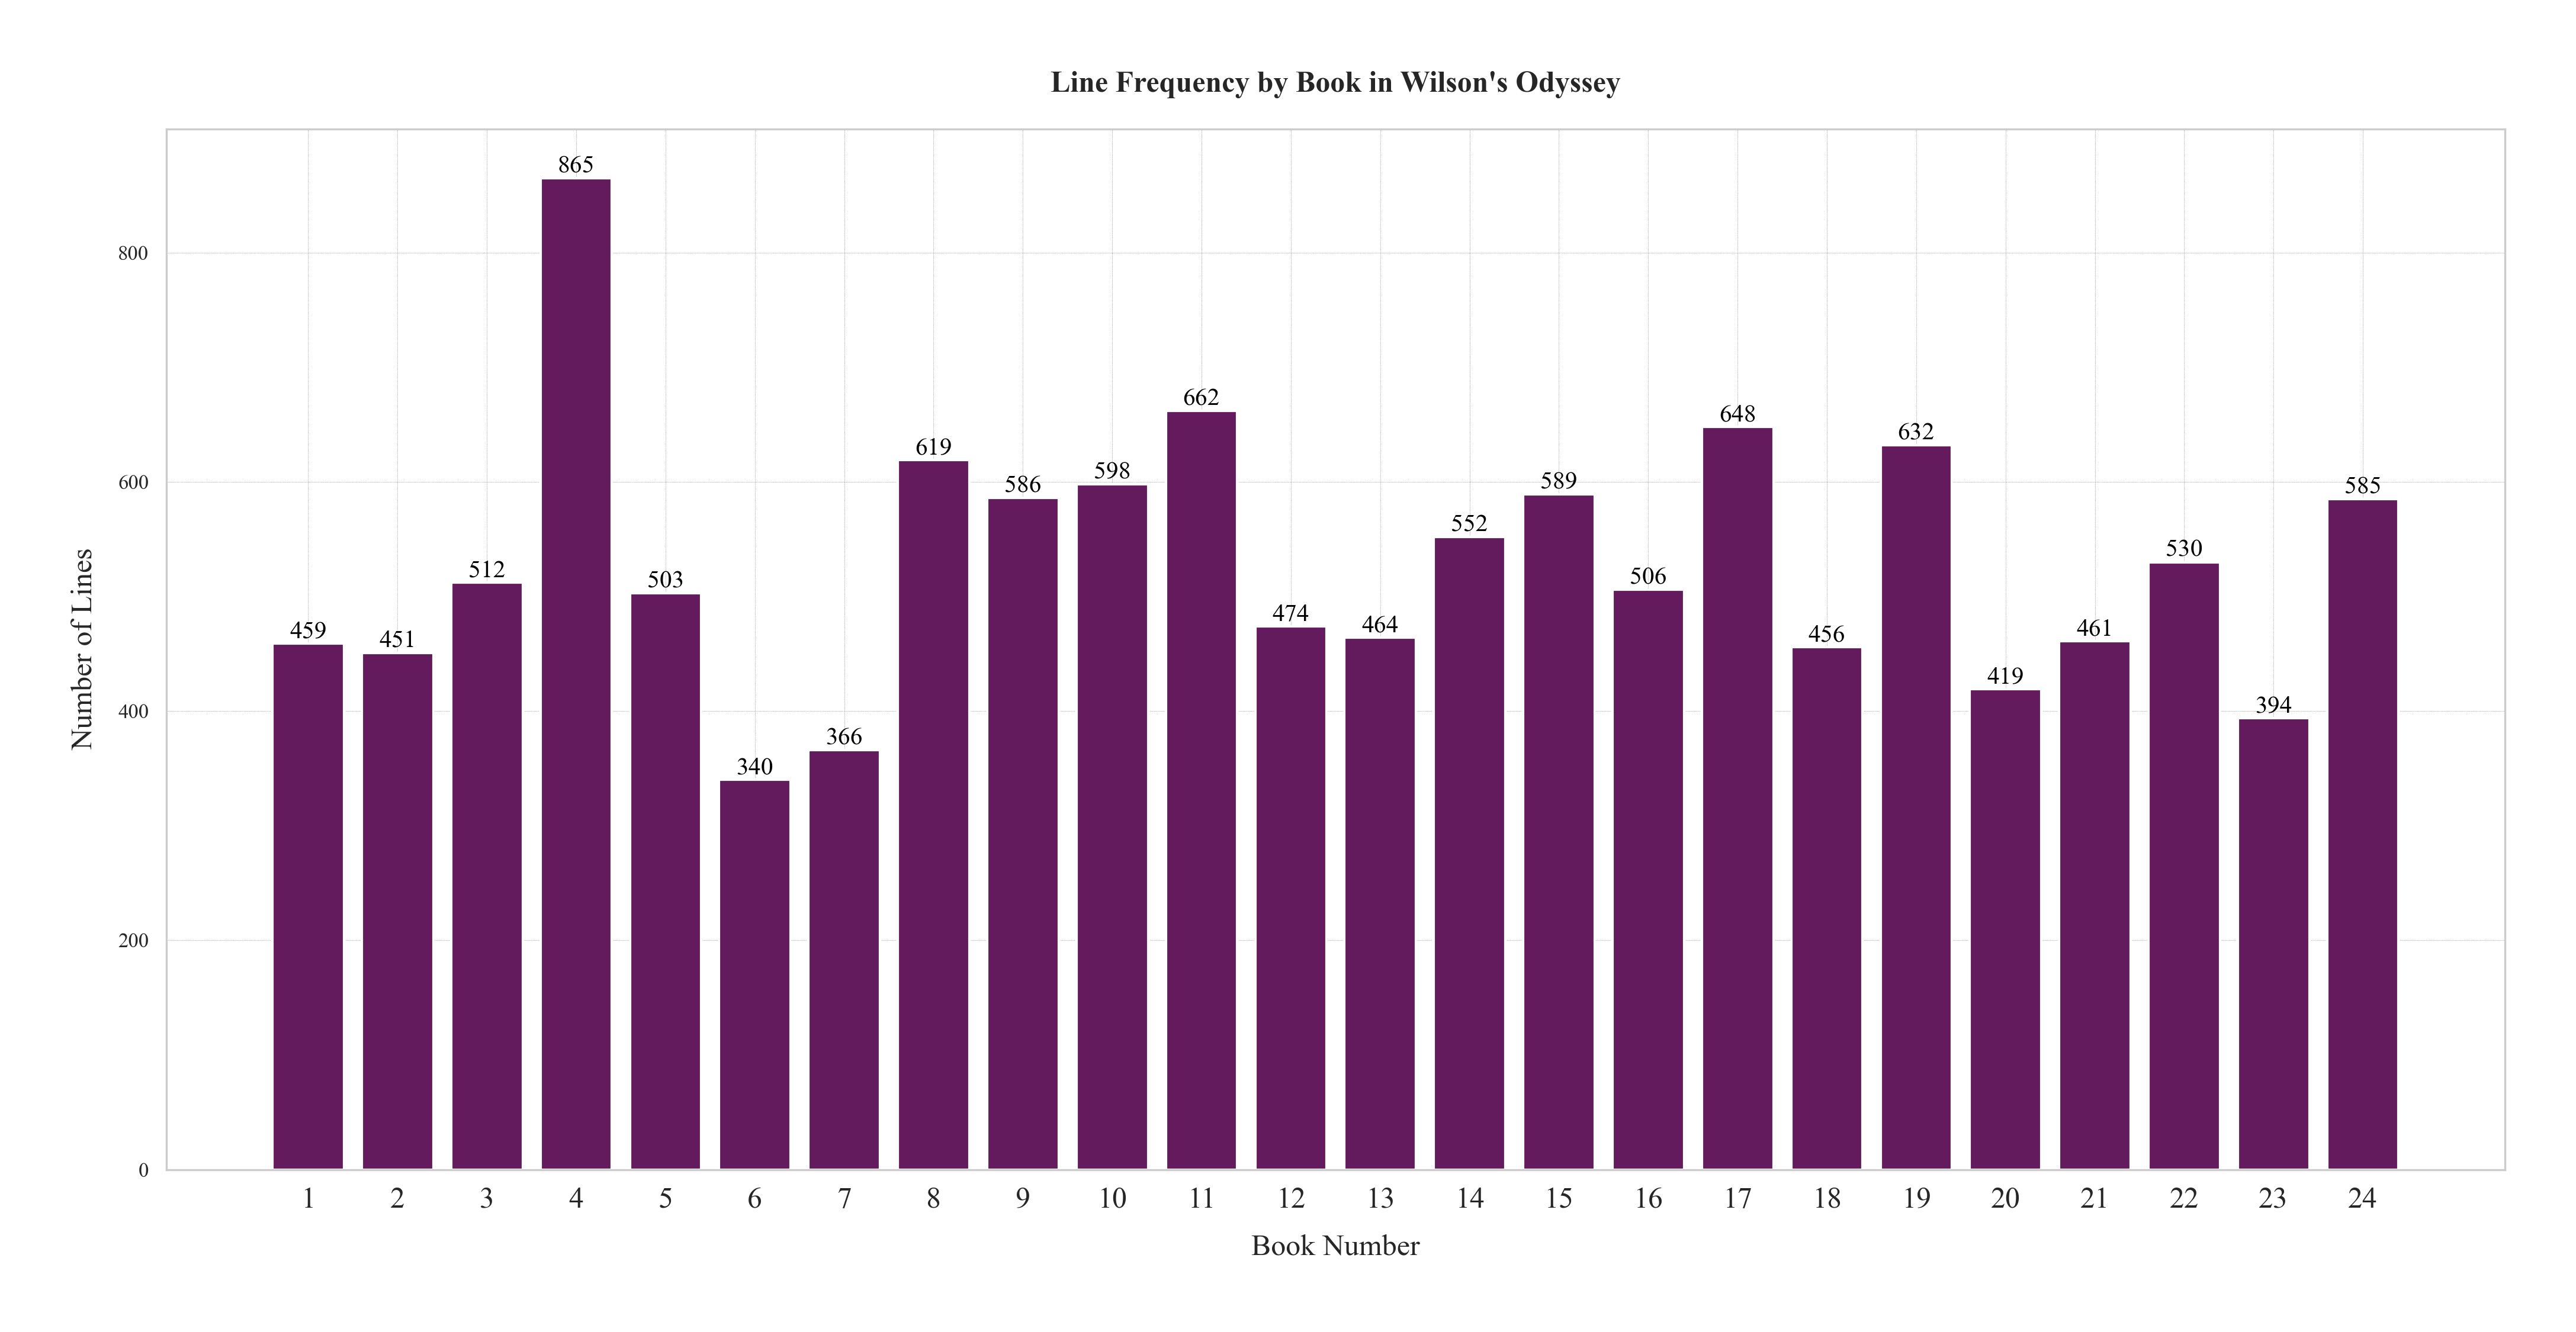

In [ ]:
# Group by book_num and count the number of lines in each book
lines_per_book = df.groupby('book_num')['num_lines'].sum()
# Create the plot using predefined styles
fig, ax = plt.subplots(figsize=(14, 7))

# Use predefined color cycle from viz.COLORS
ax.bar(lines_per_book.index, lines_per_book.values, color='#641B5E')  # Use 'orange'

ax.set_xlabel('Book Number')
ax.set_ylabel('Number of Lines')
ax.set_title("Line Frequency by Book in Wilson's Odyssey")

# Ensure all book numbers are shown on the x-axis
ax.set_xticks(lines_per_book.index)

# Grid styling from viz
ax.grid(axis='y', alpha=0.5)
# Add values on top of bars
for i, v in enumerate(lines_per_book.values):
    ax.text(i + 1, v + 5, str(v), ha='center', fontsize=10, color='black')

# Apply tight layout
plt.tight_layout()

# Save the figure using the predefined function
viz.save_figure(fig, "/Users/debr/English-Homer/dataframers_by_author/plots/Wilson-lines_freq_bB.png")

Figure saved to /Users/debr/English-Homer/dataframers_by_author/plots/Wilson-words_frequency_bB.png


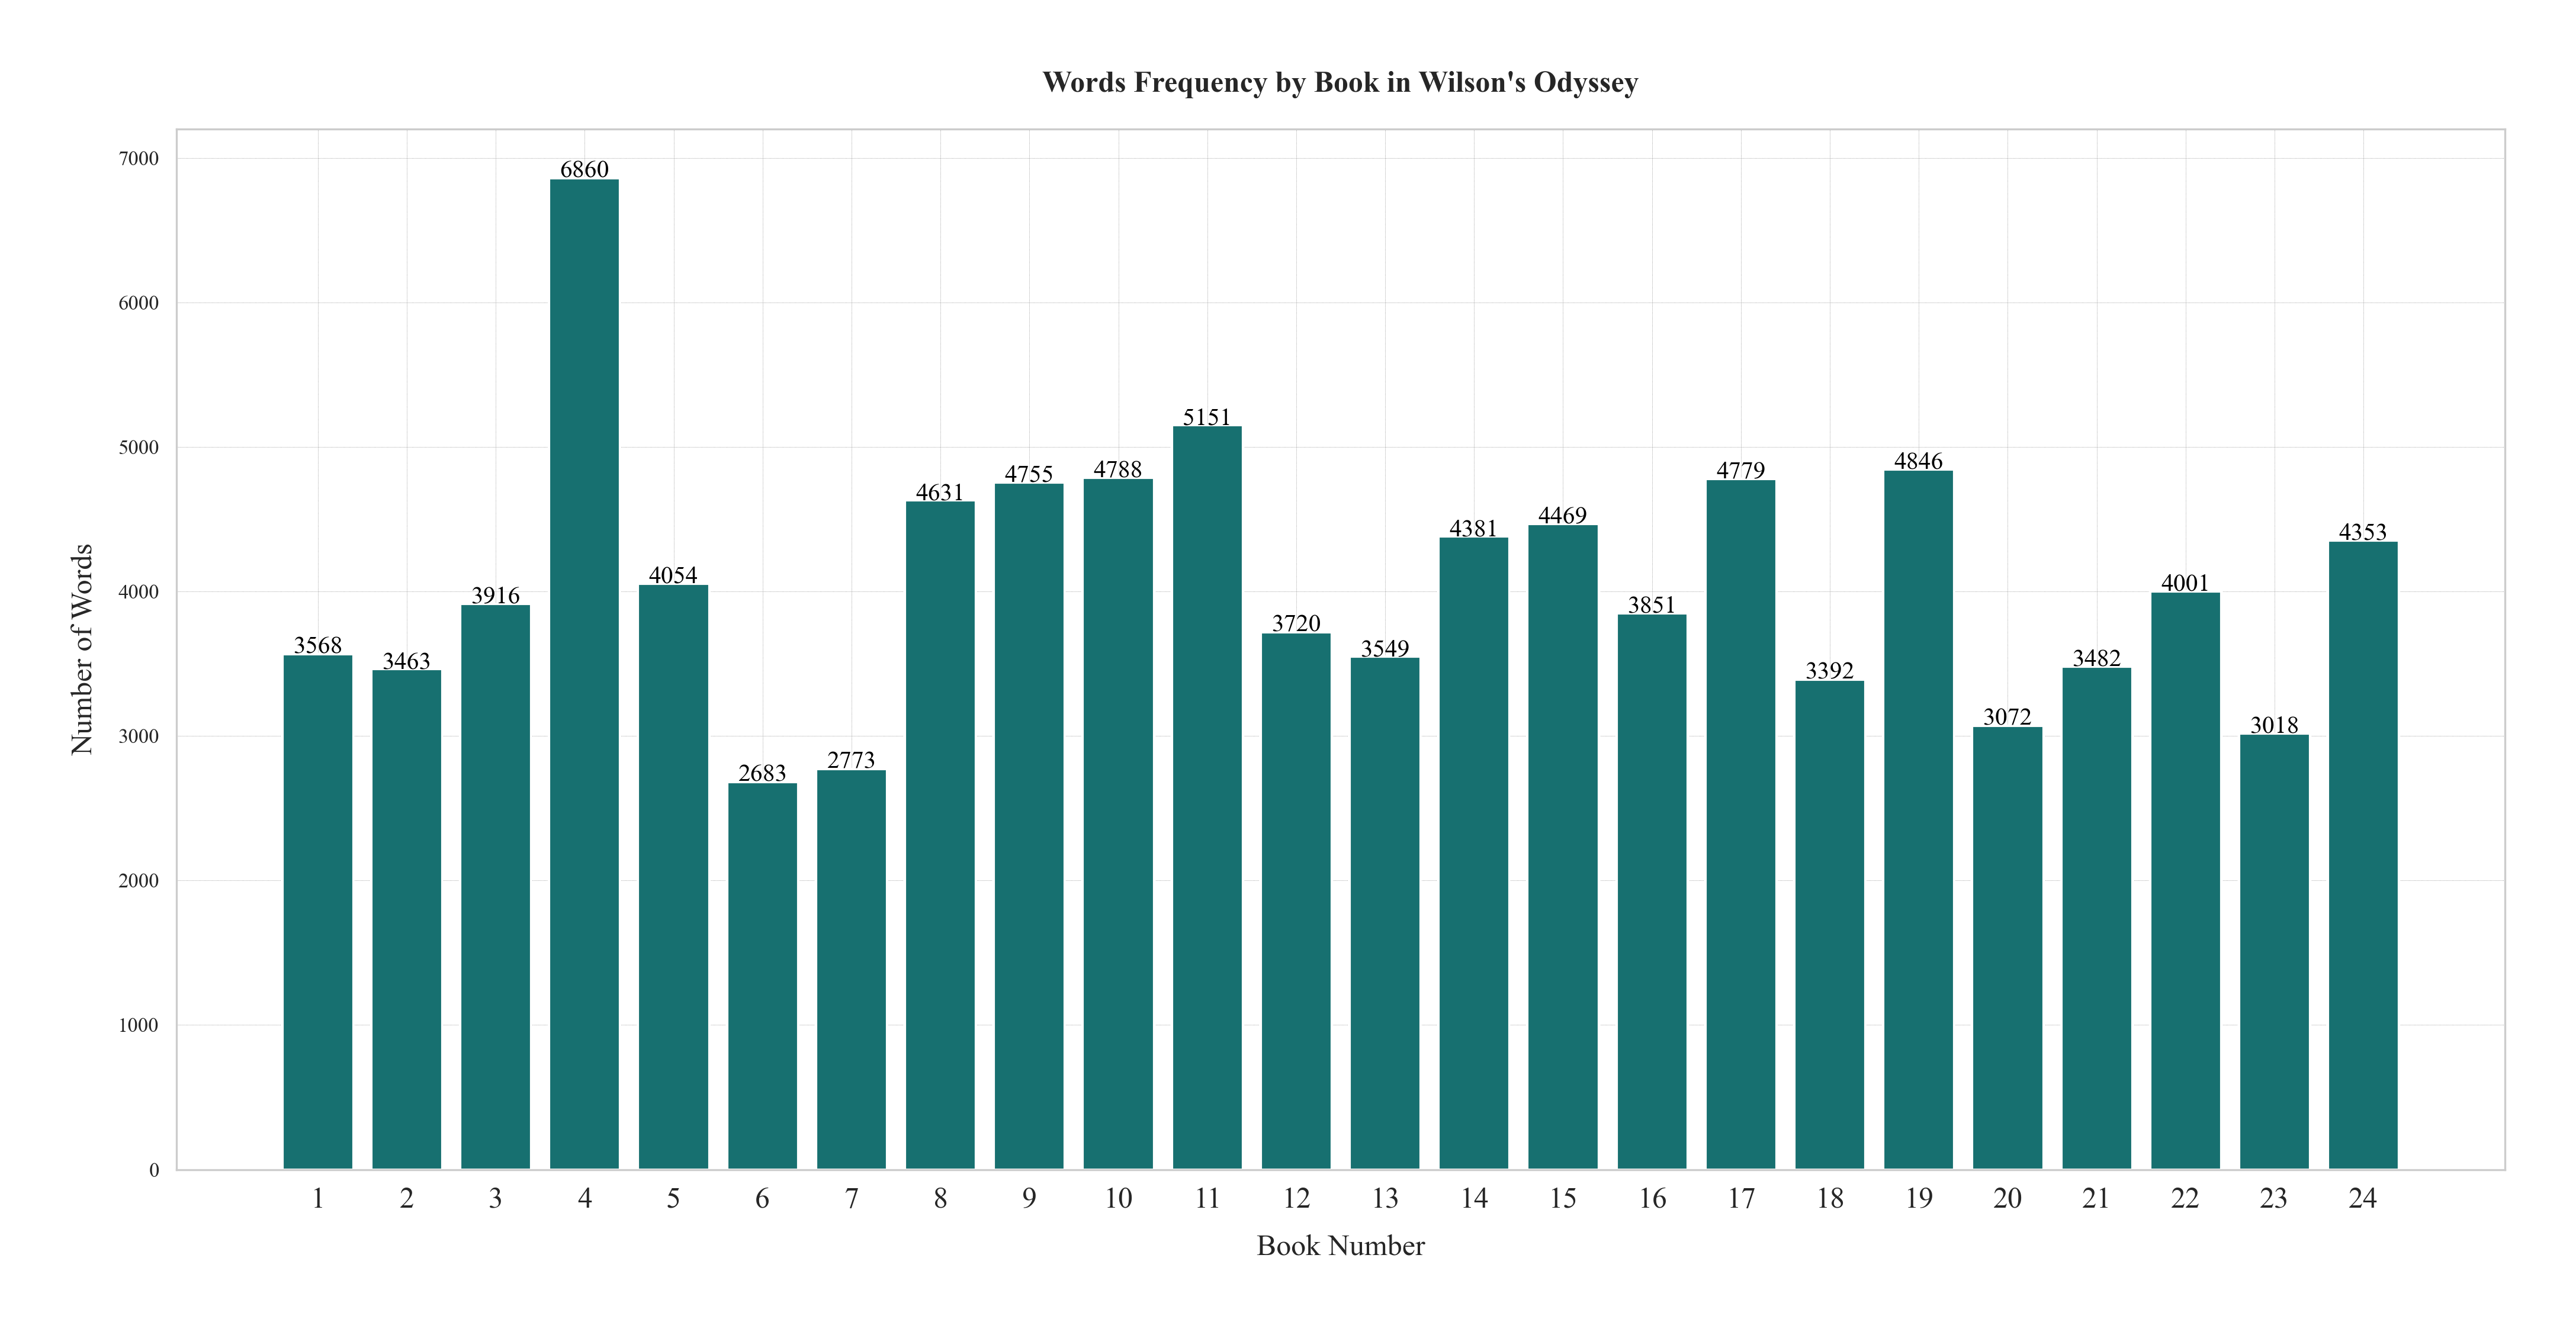

In [12]:
# Group by book_num and count the number of words in each book
words_per_book = df.groupby('book_num')['num_words'].sum()

# Create the plot using predefined styles
fig, ax = plt.subplots(figsize=(14, 7))

# Use predefined color cycle from viz.COLORS
ax.bar(words_per_book.index, words_per_book.values, color='#177070')  # Use 'orange'

ax.set_xlabel('Book Number')
ax.set_ylabel('Number of Words')
ax.set_title("Words Frequency by Book in Wilson's Odyssey")

# Ensure all book numbers are shown on the x-axis
ax.set_xticks(words_per_book.index)

# Grid styling from viz
ax.grid(axis='y', alpha=0.5)
# Add values on top of bars
for i, v in enumerate(words_per_book.values):
    ax.text(i + 1, v + 5, str(v), ha='center', fontsize=10, color='black')

# Apply tight layout
plt.tight_layout()

# Save the figure using the predefined function
viz.save_figure(fig, "/Users/debr/English-Homer/dataframers_by_author/plots/Wilson-words_frequency_bB.png")



In [13]:
# Create output directory if it doesn't exist
output_filepath = "/Users/debr/odysseys_en/Odyssey_dfs/Odyssey_Wilson_eda.csv"
os.makedirs(os.path.dirname(output_filepath), exist_ok=True)

# save df to csv
df.to_csv(output_filepath, index=False)

